<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/master/interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interference with multiple sources


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Constants

In [2]:
pi = np.pi  # value of π  (Alt 227) 
c = 3E8     # speed of light (m/s)
λ = 5E-7    # wavelength (m)  (Alt 955) 
k = 2*pi/λ  # wavenumber in rad/m
ω = k*c     # angular frequency  (Alt 969) 


#### Definition for electric wave sources 

In [3]:
def source(yi,yf,t):
  """The electric field at point (x,yf) and time t from source at point (0,yi)"""
  x=1 # position of the screen in meters
  
  # distance from source to screen 
  r = np.sqrt((yf-yi)**2+x**2)

  # electric field at position (x,yf)
  E=np.cos(k*r-ω*t)
  return E

In [4]:
def multipleSource(n,d,yf,t):
  """The total electric field at point (x,yf) and time t from n multiple sources located a distance "d" apart"""
  
  #The sources are equally located from -(n-1)*d/2 to (n-1)*d/2
  # eg. for n=2    -d/2, and d/2
  # eg. for n=3      -d, 0, d
  # eg. for n=4    -3d/2,  -d/2, d/2, 3d/2, etc 
  sourceLocation = np.linspace(-(n-1)*d/2,(n-1)*d/2,n)

  # sum all the e field contributions from the all the sources  
  ETotal=np.sum(source(sourceLocation,yf,t))

  return ETotal

In [15]:
def averageIntensity(n,d,yf):
  """The time average intensity at point (x,yf) from n multiple sources located a distance d apart """
  period = 2*pi/ω
  arrayLength = 200
  timeArray=np.linspace(0, period, arrayLength)
  
  intensityTimeArray=[]
  for t in timeArray:
    intensityTimeArray.append(multipleSource(n,d,yf,t)**2)

  intensityTimeAverage=1/arrayLength*np.sum(intensityTimeArray)
  return intensityTimeAverage

#### Plotting Intensity as a function of position  

In [30]:
# find the intensity as a function of position on screen I(y) where y is a range 
def intensityArray(n,d,yRange):
  # define initial array
  intensityArray=[]
  # run for all variables of yRange and find the intensity
  for y in yRange:
    intensityArray.append(averageIntensity(n,d,y))

  return intensityArray


In [31]:
#Define the yArray

yEnd = 0.0015
yLower= -yEnd
yUpper= yEnd
yArray= np.linspace(yLower, yUpper, 200)


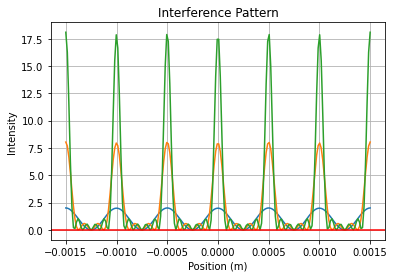

In [32]:
d=0.001 # distance between adjacent slits in meters

I1= intensityArray(2,d,yArray)
I2= intensityArray(4,d,yArray)
I3= intensityArray(6,d,yArray)

plt.plot(yArray, I1)
plt.plot(yArray, I2)
plt.plot(yArray, I3)

plt.title('Interference Pattern')
plt.xlabel('Position (m)')
plt.ylabel('Intensity')
plt.grid(True, which='both')
plt.axhline(y=0, color='r')
plt.savefig("interferenceMultipleSlits.png", dpi=300)

# Display the plot
plt.show()

In [38]:
d=0.0001
averageIntensity(3,d,0)/averageIntensity(2,d,0)

2.2479930167680813